# Traffic Per Capita in Pittsburgh Neighborhoods

The best neighborhood in Pittsburgh is determined by the amount of traffic, the lower the traffic, the better the neighborhood.

### What makes it the "best" neighborhood?

The best neighborhood is determined by finding the total cars found on the road in a certain amount of time, (found in the Traffic dataset) then dividing this by the respective neighborhoods population (found in the neighborhoods dataset). Then multiplying this number by 2 and finally subtracting it from 100 to get the grade percentage. 

The total traffic of a neighborhood is found by iterating through the dataset of traffic and assigning a neighborhood its respective car traffic total.

total_traffic[row['neighborhood']] = row['average_daily_car_traffic']

The neighborhood population is assigned to a dictionary from the neighborhoods dataset.

neighborhood_pop[row['Neighborhood']] = row['2020_Total_Population']

The vehicle per capita is found by dividing the total traffic by the neighborhood population

vehicle_per_capita[person] = total_traffic[car] / neighborhood_pop[person]

The traffic grade is found by subtracting twice the vehicle per capita from 100.

traffic_grades[capita] = 100 - (2 * vehicle_per_capita[capita])

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Creates a pandas file for program access
traffic = pd.read_csv("Traffic.csv", index_col="_id")
neighborhoods = pd.read_csv("neighborhoods.csv", index_col="_id")

In [8]:
total_traffic = {}

for index, row in traffic.iterrows():
    
    if row['average_daily_car_traffic'] > 0:
        if str(row['neighborhood']) != 'nan':
            if row['neighborhood'] in total_traffic:
                total_traffic[row['neighborhood']] += row['average_daily_car_traffic']
            else:
                total_traffic[row['neighborhood']] = row['average_daily_car_traffic']

total_traffic = dict(sorted(total_traffic.items()))

print('This is the total traffic of each neighborhood \n')
print(total_traffic)

This is the total traffic of each neighborhood 

{'Allegheny Center': 2386.0, 'Allegheny West': 477.0, 'Arlington': 4571.0, 'Beechview': 4255.0, 'Beltzhoover': 1577.0, 'Bloomfield': 43101.0, 'Bluff': 5365.0, 'Brighton Heights': 7547.0, 'Brookline': 39144.0, 'California-Kirkbride': 14926.0, 'Carrick': 13787.0, 'Central Business District': 2305.0, 'Central Lawrenceville': 13499.0, 'Central Northside': 5945.0, 'Central Oakland': 11306.0, 'Chartiers City': 2571.0, 'Crafton Heights': 11500.0, 'Duquesne Heights': 5831.0, 'East Allegheny': 1924.0, 'East Hills': 16253.0, 'East Liberty': 51247.0, 'Elliott': 4028.0, 'Fineview': 419.0, 'Friendship': 4887.0, 'Greenfield': 7158.0, 'Hazelwood': 2579.0, 'Highland Park': 23471.0, 'Homewood North': 7027.0, 'Homewood South': 42742.0, 'Knoxville': 7646.0, 'Larimer': 37713.0, 'Lincoln Place': 126.0, 'Lincoln-Lemington-Belmar': 195.0, 'Lower Lawrenceville': 3472.0, 'Manchester': 21293.0, 'Marshall-Shadeland': 15520.0, 'Morningside': 14345.0, 'Mount Washing

In [9]:
neighborhood_pop = {}

for index, row in neighborhoods.iterrows():
    
    neighborhood_pop[row['Neighborhood']] = row['2020_Total_Population']
    
print('This is the population of each neighborhood in Pittsburgh \n')
    
print(neighborhood_pop)

This is the population of each neighborhood in Pittsburgh 

{'Allegheny Center': 1419, 'Allegheny West': 540, 'Allentown': 2305, 'Arlington - Arlington Heights (Combined)': 2040, 'Banksville': 4127, 'Bedford Dwellings': 1386, 'Beechview': 7596, 'Beltzhoover': 1604, 'Bloomfield': 8665, 'Bluff': 5882, 'Bon Air': 759, 'Brighton Heights': 7105, 'Brookline': 13063, 'California-Kirkbride': 709, 'Carrick': 10290, 'Central Business District (Downtown)': 5477, 'Central Lawrenceville': 4720, 'Central Northside': 2972, 'Central Oakland': 5835, 'Chartiers City': 492, 'Chateau': 19, 'Crafton Heights': 3999, 'Crawford-Roberts': 2293, 'Duquesne Heights': 2397, 'East Allegheny': 1903, 'East Carnegie': 491, 'East Hills': 2892, 'East Liberty': 6187, 'Elliott': 2193, 'Esplen': 322, 'Fairywood': 1092, 'Fineview': 1140, 'Friendship': 1963, 'Garfield': 3643, 'Glen Hazel': 659, 'Greenfield': 7261, 'Hays': 321, 'Hazelwood': 3889, 'Highland Park': 6235, 'Homewood North': 2617, 'Homewood South': 2260, 'Homewood

In [10]:
vehicle_per_capita = {}

for car in total_traffic:
    
    for person in neighborhood_pop:
        
        if car <= person:
            
            vehicle_per_capita[person] = total_traffic[car] / neighborhood_pop[person]
            break
    
print('This is the vehicle per capita of each neighborhood in Pittsburgh \n')
    
print(vehicle_per_capita)

This is the vehicle per capita of each neighborhood in Pittsburgh 

{'Allegheny Center': 1.6814658210007047, 'Allegheny West': 0.8833333333333333, 'Arlington - Arlington Heights (Combined)': 2.240686274509804, 'Beechview': 0.5601632438125329, 'Beltzhoover': 0.9831670822942643, 'Bloomfield': 4.974148874783612, 'Bluff': 0.912104726283577, 'Brighton Heights': 1.0622097114707951, 'Brookline': 2.996555155783511, 'California-Kirkbride': 21.052186177715093, 'Carrick': 1.3398445092322644, 'Central Business District (Downtown)': 0.42085083074675916, 'Central Lawrenceville': 2.859957627118644, 'Central Northside': 2.000336473755047, 'Central Oakland': 1.937617823479006, 'Chartiers City': 5.225609756097561, 'Crafton Heights': 2.8757189297324333, 'Duquesne Heights': 2.4326241134751774, 'East Allegheny': 1.0110352075669995, 'East Hills': 5.619986168741355, 'East Liberty': 8.283012768708582, 'Elliott': 1.8367533059735521, 'Fineview': 0.3675438596491228, 'Friendship': 2.489556800815079, 'Greenfield':

In [11]:
traffic_grades = {}

for capita in vehicle_per_capita:
    traffic_grades[capita] = 100 - (2 * vehicle_per_capita[capita])

%store traffic_grades

print('This is the grade each neighborhood has been given \n')

print(traffic_grades)

Stored 'traffic_grades' (dict)
This is the grade each neighborhood has been given 

{'Allegheny Center': 96.63706835799859, 'Allegheny West': 98.23333333333333, 'Arlington - Arlington Heights (Combined)': 95.51862745098039, 'Beechview': 98.87967351237494, 'Beltzhoover': 98.03366583541147, 'Bloomfield': 90.05170225043278, 'Bluff': 98.17579054743284, 'Brighton Heights': 97.87558057705841, 'Brookline': 94.00688968843298, 'California-Kirkbride': 57.895627644569814, 'Carrick': 97.32031098153547, 'Central Business District (Downtown)': 99.15829833850648, 'Central Lawrenceville': 94.28008474576271, 'Central Northside': 95.9993270524899, 'Central Oakland': 96.12476435304198, 'Chartiers City': 89.54878048780488, 'Crafton Heights': 94.24856214053513, 'Duquesne Heights': 95.13475177304964, 'East Allegheny': 97.977929584866, 'East Hills': 88.76002766251729, 'East Liberty': 83.43397446258284, 'Elliott': 96.3264933880529, 'Fineview': 99.26491228070175, 'Friendship': 95.02088639836984, 'Greenfield': 

This is a bar graph of the grades of each neighborhood


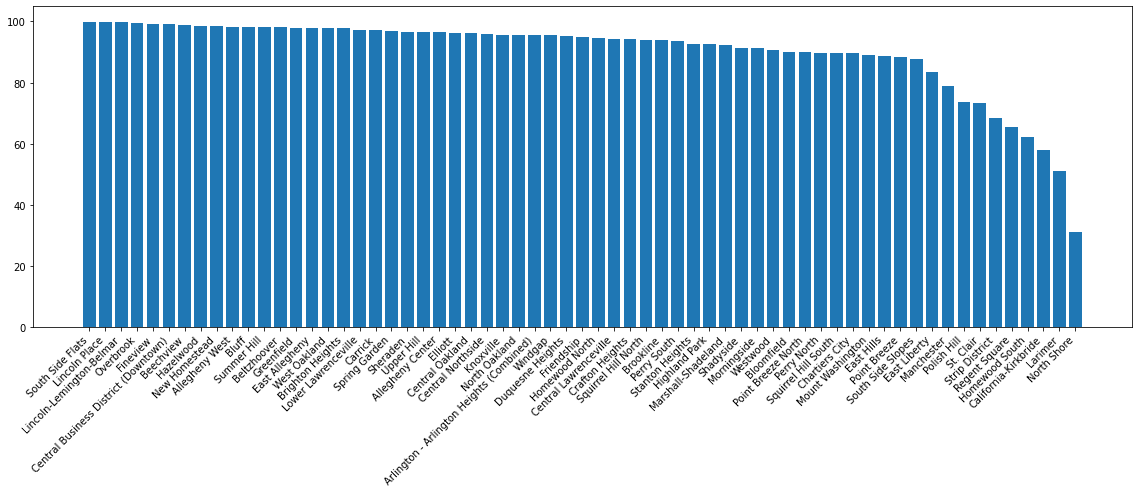

In [12]:
sorted_traffic_grades = sorted(traffic_grades.items(), key=lambda x:x[1], reverse=True)
sorted_traffic_grades = dict(sorted_traffic_grades)

def cm_to_inch(value):
    return value/2.54

names = list(sorted_traffic_grades.keys())
values = list(sorted_traffic_grades.values())

print('This is a bar graph of the grades of each neighborhood')

plt.figure(figsize=(cm_to_inch(50), cm_to_inch(15)))
plt.bar(range(len(sorted_traffic_grades)),values,tick_label=names)
plt.xticks(rotation=45, ha='right')
plt.show()